# Demo: E$^2$M algorithm for dense tensor

In [1]:
import sys
sys.path.append("../src/")

from PIL import Image
import eemix_dense as eemix
import numpy as np
import importlib
import matplotlib.pyplot as plt

import utils_demo
from utils_demo import get_plot
from utils_demo import get_data

In [3]:
eemix.eemix?

Signature:
eemix.eemix(
    T,
    Rs,
    alpha=1.0,
    model=[1, 1, 1, 1],
    max_iter=10,
    iter_inside=1,
    update_rule=0,
    tol=0.0001,
    init_weights=None,
    learn_weights=True,
    verbose=True,
    verbose_interval=1,
    loss_history=True,
    conv_check_interval=10,
    avoid_nan=True,
)
Docstring:
Args:
    T  (multidimensional array): input tensor
    Rs (list): Ranks Rs = [Rcp (int), Rtucker(list), Rtrain(list)]
    alpha (real number): alpha of alpha-divergence.
        If alpha = 1.0, then KL div.
        If alpha = 0.5, then Hellinger distance.
    iter_inside(int>0): the number of loop in inside EM-algorithm.
    learn_weights(Boolen): True for learn mixture ratio otherwise False
    loss_history(Boolen): True to record loss history otherwise False
    avoid_nan(Boolen): True to ignore zero value in T and avoid log(0.0)
    init_weights(4-dim list): initial weights. None for random init

Returns:
    factors(dict): obtained factors
    P (multidimensional a

# Run pure models for random tensor

In [4]:
## define normalized non-negative tensor
input_tensor = np.random.rand(10,10,10,10)
input_tensor = input_tensor / np.sum(input_tensor)

## define alpha
alpha = 0.5 # if alpha=1.0, the cost function is the KL div.

The EEM algorithm supports CP, Tucker, and Train decomposition. Chose low-rank structure and define the rank to run the decomposition as follows:

In [5]:
## define tensor rank
r_cp = 40; r_tucker=0; r_train=0;  model = [1,0,0,0] # For CP decomp
# r_cp = 0;  r_tucker=5; r_train=0;  model = [0,1,0,0] # For Tucker decomp
# r_cp = 0;  r_tucker=0; r_train=10; model = [0,0,1,0] # For train decomp
rank = [r_cp, r_tucker, r_train]

Run the factorization. We can see the monotonical decreasing of the objective funtion.  
`factors` and `P` provides obtained low-rank factors and reconstracted low-rank tensor, respectively. 

In [6]:
factors, P, history, details = eemix.eemix(input_tensor, rank, model=model, alpha=alpha, init_weights="random", learn_weights=False,
            tol=1.0e-6, max_iter=100, verbose_interval=10);


EM mixture tensor learning for DENSE data
Included low-rank structures:
CPD        n_params:1441     Rank :40   
Learn weights            :     False.

Total number of params   :      1441
Sample number in data    :     10000
Objective function       :       0.5-div.

Iteration   KL Error      α-Error     L2 Error        Weights  CP      Tucker  Train   Noise     Sum      
Iter:    10 KL: 0.5870058 α:0.4641724 L2: 0.7492631 | Weights: 0.35128 0.00000 0.00000 0.00000 | 0.35 | 0.13 sec.
Iter:    20 KL: 0.5823362 α:0.4608871 L2: 0.7475089 | Weights: 0.35128 0.00000 0.00000 0.00000 | 0.35 | 0.25 sec.
Iter:    30 KL: 0.5795979 α:0.4587922 L2: 0.7461777 | Weights: 0.35128 0.00000 0.00000 0.00000 | 0.35 | 0.36 sec.
Iter:    40 KL: 0.5776561 α:0.4572170 L2: 0.7450603 | Weights: 0.35128 0.00000 0.00000 0.00000 | 0.35 | 0.48 sec.
Iter:    50 KL: 0.5760424 α:0.4558761 L2: 0.7440538 | Weights: 0.35128 0.00000 0.00000 0.00000 | 0.35 | 0.60 sec.
Iter:    60 KL: 0.5745493 α:0.4546299 L2: 0.7430929 |

# Run for image
`emmix` supports mixture modeling. We provide an example of the reconstruction of an image by a mixture of CP, Tucker, TT, and adaptive background term. The four binary numbers in the `model` argument represent the CP, Tucker, TT, and the background term, respectively. For example, `model = [1,0,0,1]` means a mixture model of a CP and a background term. 

In [7]:
## Convert color image to 3D tensor 
def get_photo():
    image = Image.open(f"data/toy_image.tiff")
    width, height = image.size
    image = image.resize((width // 5, height // 5))
    
    array = np.array(image).astype(np.float32)
    array /= 255.0
    array += 1.0e-8
    total_sum = array.sum()
    array /= total_sum
    return array, total_sum

input_tensor, total_sum = get_photo()

In [8]:
## -- define ranks for mixture --
## If you set a larger rank, the reconstruction becomes better.
r_cp = 100
r_tucker = 5
r_train = 10
rank = [r_cp, r_tucker, r_train]
model = [1,1,1,1]

##  -- define alpha --
alpha = 0.5

## Run optimization and obtain the reconstructed low-rank image P
factors, P, history, details = eemix.eemix(input_tensor, 
            rank, model=model, 
            alpha=alpha, init_weights="random",
            tol=1.0e-6, max_iter=100, verbose_interval=10
           );


Rtrain need to be vector
Thus, Rtrain is modified as a vector [10, 10]

Rtucker need to be vector
Thus, Rtucker is modified as a vector [5, 5, 5]

EM mixture tensor learning for DENSE data
Included low-rank structures:
CPD        n_params:20401    Rank :100  
Tucker     n_params:1160     Rank :[5, 5, 5]
Train      n_params:11251    Rank :[10, 10]
Noise     
Learn weights            :      True.

Total number of params   :     32813
Sample number in data    :     31212
Objective function       :       0.5-div.

Iteration   KL Error      α-Error     L2 Error        Weights  CP      Tucker  Train   Noise     Sum      
Iter:    10 KL: 0.1307829 α:0.1531748 L2: 0.4041978 | Weights: 0.24164 0.29621 0.29001 0.17214 | 1.00 | 2.69 sec.
Iter:    20 KL: 0.1133844 α:0.1330140 L2: 0.3724555 | Weights: 0.28682 0.28248 0.27641 0.15428 | 1.00 | 5.30 sec.
Iter:    30 KL: 0.0798854 α:0.0932559 L2: 0.3092389 | Weights: 0.38427 0.24902 0.24525 0.12147 | 1.00 | 7.86 sec.
Iter:    40 KL: 0.0540058 α:0.0622

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008750136929253664..1.219805170738479].


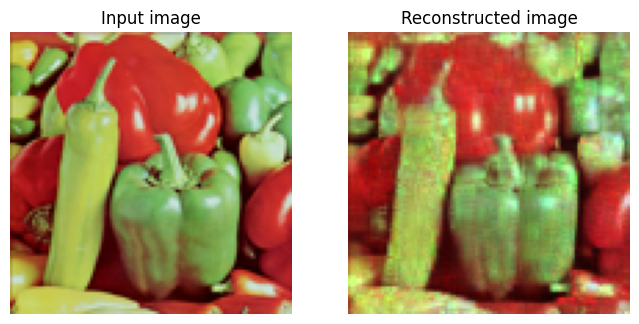

In [9]:
# Check the reconstructed image

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Input image")
plt.axis("off")
plt.imshow(input_tensor * total_sum)

plt.subplot(1,2,2)
plt.title("Reconstructed image")
plt.axis("off")
plt.imshow(P * total_sum)

# Outlier robustness by alpha
The EEM algorithm has a strong advantage in terms of robustness to outliers and noise. Let us confirm that here. Firstly, we prepare the noisy two-class datasets

In [10]:
import importlib
importlib.reload(utils_demo)
# Import synthesized data with mislabeling and noise
tensor = get_data(num_outliers=0)
tensor_with_noise = get_data(num_outliers=150)

# Convert to normalize dist.
tensor = tensor / np.sum(tensor)
tensor_with_noise = tensor_with_noise / np.sum(tensor_with_noise)

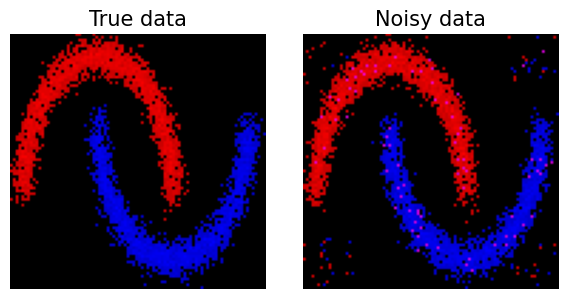

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(6,3))
get_plot(tensor, tensor, title="True data", ax=axs[0], fontsize=15)
get_plot(tensor_with_noise, tensor, title="Noisy data", ax=axs[1], fontsize=15)
plt.tight_layout()
plt.show()

In [12]:
rank = [50, 0, 0]
model = [1, 0, 0, 1]
importlib.reload(eemix)

_, P_a01, _, _ = eemix.eemix(tensor_with_noise, rank, model=model, alpha=0.1, tol=1.0e-8, max_iter=400, verbose_interval=100, avoid_nan=True);
_, P_a09, _, _ = eemix.eemix(tensor_with_noise, rank, model=model, alpha=0.9, tol=1.0e-8, max_iter=400, verbose_interval=100, avoid_nan=True);


EM mixture tensor learning for DENSE data
Included low-rank structures:
CPD        n_params:8951     Rank :50   
Noise     
Learn weights            :      True.

Total number of params   :      8952
Sample number in data    :      2156
Objective function       :       0.1-div.

Iteration   KL Error      α-Error     L2 Error        Weights  CP      Tucker  Train   Noise     Sum      
Iter:   100 KL: 1.4459020 α:0.3159327 L2: 0.5308637 | Weights: 1.00000 0.00000 0.00000 0.00000 | 1.00 | 3.71 sec.
Iter:   200 KL: 1.3945648 α:0.2716197 L2: 0.4851166 | Weights: 1.00000 0.00000 0.00000 0.00000 | 1.00 | 7.37 sec.
Iter:   300 KL: 1.3736056 α:0.2565189 L2: 0.4703364 | Weights: 1.00000 0.00000 0.00000 0.00000 | 1.00 | 11.02 sec.
Iter:   400 KL: 1.3664981 α:0.2472038 L2: 0.4610475 | Weights: 1.00000 0.00000 0.00000 0.00000 | 1.00 | 14.68 sec.

EM mixture tensor learning for DENSE data
Included low-rank structures:
CPD        n_params:8951     Rank :50   
Noise     
Learn weights            :   

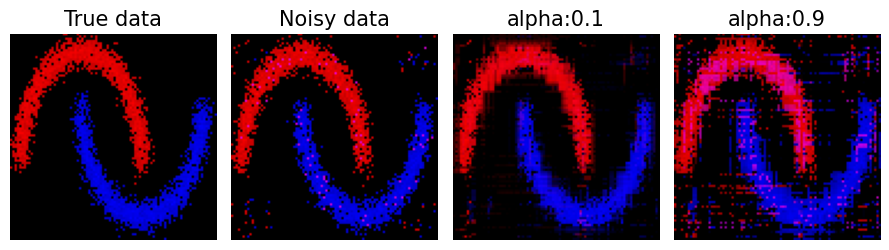

In [13]:
fontsize=15
fig, axs = plt.subplots(1, 4, figsize=(9,5))
get_plot(tensor, tensor, title="True data", ax=axs[0], fontsize=fontsize)
get_plot(tensor_with_noise, tensor, title="Noisy data", ax=axs[1], fontsize=fontsize)
get_plot(P_a01, tensor, title="alpha:0.1", ax=axs[2], fontsize=fontsize)
get_plot(P_a09, tensor, title="alpha:0.9", ax=axs[3], fontsize=fontsize)
plt.tight_layout()
plt.show()